In [250]:

import os
import cv2
import numpy as np
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [251]:

# Define the data directory
data_dir = 'drive/MyDrive/asl_dataset'
categories = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d)) and (d.isalpha() or d.isdigit())])

In [252]:
categories

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [253]:
img=cv2.imread('drive/MyDrive/asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg')
img.shape

(400, 400, 3)

In [254]:
data = []
labels = []


for category in categories:
    category_path = os.path.join(data_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)


        image = cv2.imread(img_path)
        if image is None:
            continue

        # Convert the image to RGB and resize it
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (64, 64))

        data.append(image)
        labels.append(category)

data = np.array(data, dtype='float32') / 255.0  # Normalize pixel values
labels = np.array(labels)

# Encode the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')
print(f'Label classes: {lb.classes_}')

Data shape: (2515, 64, 64, 3)
Labels shape: (2515, 36)
Label classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [255]:
# Reverse the one-hot encoding to obtain the original labels
original_labels = lb.inverse_transform(labels)

In [256]:
print(original_labels[500])
print(labels[500])


7
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [257]:
print(original_labels[1])
print(labels[1])

0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [258]:
print(original_labels[800])
print(labels[800])

b
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [259]:
#Split the Dataset into Trianing set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data, labels,test_size=0.2,random_state=0)

In [260]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape=(64, 64, 3), num_classes=len(categories)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.25),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 6, 6, 128)       

In [261]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.25, random_state=0)


In [262]:
model_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
59/59 [==============================] - 2s 14ms/step - loss: 1.7448 - accuracy: 0.5037 - val_loss: 0.4047 - val_accuracy: 0.8728
Epoch 2/10
59/59 [==============================] - 1s 9ms/step - loss: 0.4413 - accuracy: 0.8499 - val_loss: 0.2602 - val_accuracy: 0.9046
Epoch 3/10
59/59 [==============================] - 1s 9ms/step - loss: 0.2407 - accuracy: 0.9215 - val_loss: 0.1968 - val_accuracy: 0.9332
Epoch 4/10
59/59 [==============================] - 1s 11ms/step - loss: 0.1412 - accuracy: 0.9470 - val_loss: 0.1371 - val_accuracy: 0.9428
Epoch 5/10
59/59 [==============================] - 1s 11ms/step - loss: 0.1181 - accuracy: 0.9624 - val_loss: 0.1034 - val_accuracy: 0.9587
Epoch 6/10
59/59 [==============================] - 1s 10ms/step - loss: 0.0659 - accuracy: 0.9751 - val_loss: 0.1173 - val_accuracy: 0.9571
Epoch 7/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0619 - accuracy: 0.9788 - val_loss: 0.1477 - val_accuracy: 0.9571
Epoch 8/10
59/5

In [263]:
# Evaluate the model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

20/20 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.9809
Validation Loss: 0.07374352216720581
Validation Accuracy: 0.9809221029281616


In [264]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

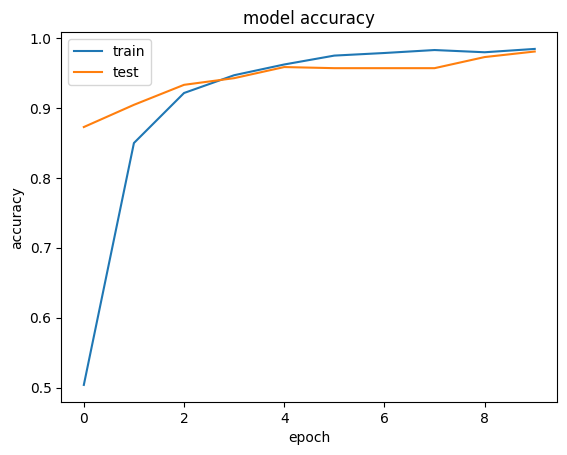

In [265]:
import matplotlib.pyplot as plt
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

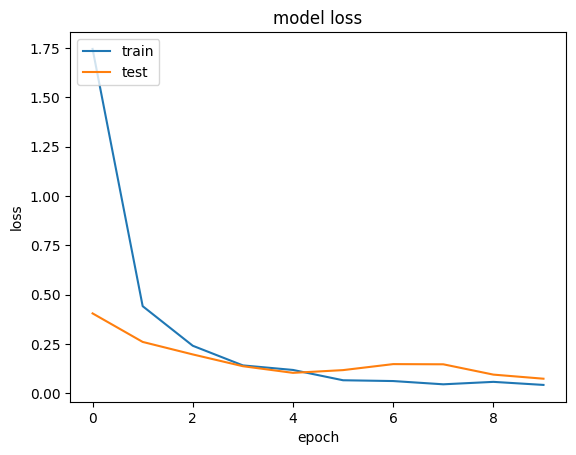

In [266]:
## summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [270]:
# predicting the test set results
y_pred=model.predict(X_test)
y_pred=(y_pred>=0.5)

16/16 [==============================] - 0s 4ms/step


In [271]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [272]:
score

0.974155069582505

In [275]:
import pickle

model.save(r"drive/MyDrive/Folder/classificationmodel")
lbinarizer=open(r"drive/MyDrive/Folder/classificationmodelbinarizer.pickle","wb")
lbinarizer.write(pickle.dumps(lb))
lbinarizer.close()